In [2]:
%matplotlib notebook
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

import numpy as np
import importlib
import integralclient as ic
importlib.reload(ic)
ic.__file__

from collections import defaultdict
import glob
from astropy.wcs import WCS

import astropy.io.fits as fits
from astropy import units as u
from astropy import constants as const

import importlib
import integralclient as ic
import numpy as np

import hashlib

hashstring = lambda x:hashlib.sha224(x.encode()).hexdigest()[:8]


import matplotlib.font_manager as font_manager

selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/
failed to import oda


In [11]:
import ddaclient

In [12]:
import yaml

bursts = yaml.load(open("draft/PAPER_SGR1935_INTEGRAL/data/burst-search/bursts.yaml"))

#for b in bursts[]

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [260]:

sgr1935_distance = 9.1*u.kpc
sgr1806_distance = 12.*u.kpc
frb121102_distance = 149.*u.Mpc



In [269]:
#Scholtz 2020 


#Burst No.	Barycentric	Peak Flux Density	Fluence	Gaussian FWHM	X-Ray Fluence Limit^b	
#Arrival Time^a	(Jy)	(Jy ms)	(ms)	(10^-10 erg cm^-2)	

frb121102_bursts = []

for r in """GBT 1	57647.232346450619	0.36	0.82	2.16 +or- 0.06	2	
GBT 2	57647.232346883015	0.08	0.16	1.94 +or- 0.25	2	
GBT 3	57649.173812898174	0.36	1.32	3.45 +or- 0.07	2	
GBT 4	57649.218213226581	0.29	0.34	0.88 +or- 0.07	2	
GBT 5	57765.049526345771	0.17	0.33	1.40 +or- 0.09	5	
GBT 6	57765.064793212950	0.38	0.83	1.79 +or- 0.04	5	
GBT 7	57765.069047502300	0.20	0.62	2.97 +or- 0.12	5	
GBT 8^c	57765.100827859293	0.09	0.18	2.46 +or- 0.28	5	
GBT 9^c	57765.120778204779	0.56	1.08	1.36 +or- 0.03	5	
GBT 10	57765.136498608757	0.11	0.22	1.68 +or- 0.17	5	
AO 1^c	57765.100827849608	0.09	0.37	4.29 +or- 0.11	5	
AO 2	57765.108680842022	0.02	0.03	3.69 +or- 0.57	5	
AO 3^c	57765.120778202479	0.02	0.05	4.34 +or- 0.44	5	
AO 4	57765.143337535257	0.03	0.10	3.66 +or- 0.32	5	""".split("\n"):
    print(r.split())
    
    frb121102_bursts.append(dict(
        energy_radio=u.GHz,
        fluence_radio=[float(r.split()[4])*u.Jy*u.ms*u.GHz, float(r.split()[4])*u.Jy*u.ms*u.GHz, float(r.split()[4])*u.Jy*u.ms*u.GHz],
        energy_xray=np.array([3, 0.5, 10])*u.keV,
        fluence_xray=[float(r.split()[8])*1e-10*u.erg/u.cm**2, float(r.split()[8])*1e-10*u.erg/u.cm**2, float(r.split()[8])*1e-10*u.erg/u.cm**2],
    ))
    
frb121102_bursts

['GBT', '1', '57647.232346450619', '0.36', '0.82', '2.16', '+or-', '0.06', '2']
['GBT', '2', '57647.232346883015', '0.08', '0.16', '1.94', '+or-', '0.25', '2']
['GBT', '3', '57649.173812898174', '0.36', '1.32', '3.45', '+or-', '0.07', '2']
['GBT', '4', '57649.218213226581', '0.29', '0.34', '0.88', '+or-', '0.07', '2']
['GBT', '5', '57765.049526345771', '0.17', '0.33', '1.40', '+or-', '0.09', '5']
['GBT', '6', '57765.064793212950', '0.38', '0.83', '1.79', '+or-', '0.04', '5']
['GBT', '7', '57765.069047502300', '0.20', '0.62', '2.97', '+or-', '0.12', '5']
['GBT', '8^c', '57765.100827859293', '0.09', '0.18', '2.46', '+or-', '0.28', '5']
['GBT', '9^c', '57765.120778204779', '0.56', '1.08', '1.36', '+or-', '0.03', '5']
['GBT', '10', '57765.136498608757', '0.11', '0.22', '1.68', '+or-', '0.17', '5']
['AO', '1^c', '57765.100827849608', '0.09', '0.37', '4.29', '+or-', '0.11', '5']
['AO', '2', '57765.108680842022', '0.02', '0.03', '3.69', '+or-', '0.57', '5']
['AO', '3^c', '57765.120778202479',

[{'energy_radio': Unit("GHz"),
  'fluence_radio': [<Quantity 0.82 GHz Jy ms>,
   <Quantity 0.82 GHz Jy ms>,
   <Quantity 0.82 GHz Jy ms>],
  'energy_xray': <Quantity [ 3. ,  0.5, 10. ] keV>,
  'fluence_xray': [<Quantity 2.e-10 erg / cm2>,
   <Quantity 2.e-10 erg / cm2>,
   <Quantity 2.e-10 erg / cm2>]},
 {'energy_radio': Unit("GHz"),
  'fluence_radio': [<Quantity 0.16 GHz Jy ms>,
   <Quantity 0.16 GHz Jy ms>,
   <Quantity 0.16 GHz Jy ms>],
  'energy_xray': <Quantity [ 3. ,  0.5, 10. ] keV>,
  'fluence_xray': [<Quantity 2.e-10 erg / cm2>,
   <Quantity 2.e-10 erg / cm2>,
   <Quantity 2.e-10 erg / cm2>]},
 {'energy_radio': Unit("GHz"),
  'fluence_radio': [<Quantity 1.32 GHz Jy ms>,
   <Quantity 1.32 GHz Jy ms>,
   <Quantity 1.32 GHz Jy ms>],
  'energy_xray': <Quantity [ 3. ,  0.5, 10. ] keV>,
  'fluence_xray': [<Quantity 2.e-10 erg / cm2>,
   <Quantity 2.e-10 erg / cm2>,
   <Quantity 2.e-10 erg / cm2>]},
 {'energy_radio': Unit("GHz"),
  'fluence_radio': [<Quantity 0.34 GHz Jy ms>,
   <Qua

<IPython.core.display.Javascript object>


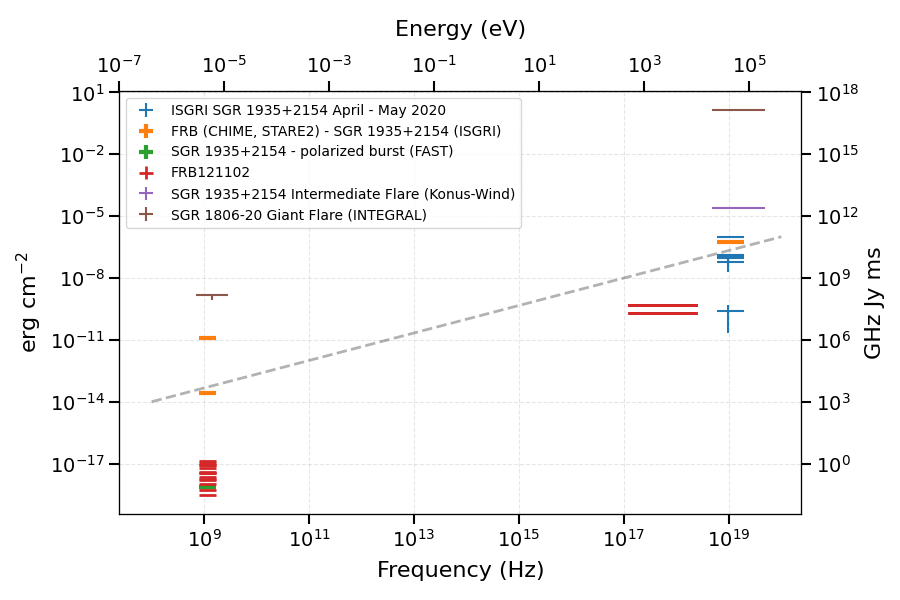

[1.16911075e-07 9.17493063e-08 1.42072844e-07] erg / cm2
[1.02561908e-07 7.36720779e-08 1.31451739e-07] erg / cm2
[1.26799722e-07 1.09797205e-07 1.43802239e-07] erg / cm2
[9.74660920e-08 8.12139167e-08 1.13718267e-07] erg / cm2
[5.87584347e-08 1.98440546e-08 9.76728147e-08] erg / cm2
[1.18422882e-07 8.84907308e-08 1.48355033e-07] erg / cm2
[5.85232098e-07 5.62956847e-07 6.07507349e-07] erg / cm2
[2.42698929e-10 2.06031323e-11 4.64794725e-10] erg / cm2
[9.32252807e-07 8.27745582e-07 1.03676003e-06] erg / cm2


In [393]:
f,ax1=plt.subplots(1,1, figsize=(9,6))

ax1.grid(True, alpha=0.3, ls="--")

font_prop = font_manager.FontProperties(size=16)
font_prop14 = font_manager.FontProperties(size=14)


sgr1935_distance = 9.1*u.kpc

## ISGRI bursts

i_bursts=[]
for b in bursts:
    if 'fit' not in b:
        continue
        
    flux = np.array(b['fit']['flux'])*u.erg/u.cm**2/u.s
    
    
    flux[0] = (flux[1] + flux[2])/2.
    
    fluence = b['bblocks']['length_s']*u.s * flux
    
    #Eiso = 
    
    print(fluence)
    
    i_bursts.append(dict(fluence=fluence, flux=flux, energy=np.array([40, 25, 80])*u.keV, utc=b['utc_integral']))
    
    ib = i_bursts[-1]
    ib['eiso'] = 4*np.pi*sgr1935_distance**2*ib['fluence']

def plot_on_sed_eiso(_ax, values, label, **kwargs):
    _ax.errorbar(
        [ (i['energy'][0]/const.h).to(u.Hz).value for i in values ],
        [ i['eiso'][0].to(u.erg).value for i in values ],
        xerr = (
            [ ((i['energy'][0]-i['energy'][1])/const.h).to(u.Hz).value for i in values ],
            [ ((i['energy'][2]-i['energy'][0])/const.h).to(u.Hz).value for i in values ],
        ),
        yerr=(        
            [ (i['eiso'][0] - i['eiso'][1]).to(u.erg).value for i in values ],
            [ (i['eiso'][2] - i['eiso'][0]).to(u.erg).value for i in values ]
        ),
        ls="",
        label=label,
        **kwargs
    )
    
def plot_on_sed_fluence(_ax, values, label, **kwargs):
    _ax.errorbar(
        [ (i['energy'][0]/const.h).to(u.Hz).value for i in values ],
        [ i['fluence'][0].to(u.erg/u.cm**2).value for i in values ],
        xerr = (
            [ ((i['energy'][0]-i['energy'][1])/const.h).to(u.Hz).value for i in values ],
            [ ((i['energy'][2]-i['energy'][0])/const.h).to(u.Hz).value for i in values ],
        ),
        yerr=(        
            [ (i['fluence'][0] - i['fluence'][1]).to(u.erg/u.cm**2).value for i in values ],
            [ (i['fluence'][2] - i['fluence'][0]).to(u.erg/u.cm**2).value for i in values ]
        ),
        ls="",
        label=label,
        **kwargs
    )

plot_on_sed = plot_on_sed_fluence
yaxis = "erg cm$^{-2}$"
#yaxis = "erg"
    
plot_on_sed(ax1, i_bursts, "ISGRI SGR 1935+2154 April - May 2020")

## FRB-ISGRI
    
frb_isgri = [i for i in i_bursts if '14:34' in i['utc']]

# CHIME
frb_isgri.append(dict(
    energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
    fluence = np.array((2,2,2))*u.kJy*u.ms * u.GHz*1.25,
))

frb_isgri[-1]['eiso'] = frb_isgri[-1]['fluence']*sgr1935_distance**2*4*np.pi

#STARE2
    
frb_isgri.append(dict(
    energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
    fluence = np.array((1,1,1))*u.MJy*u.ms * u.GHz*1.25
))
    
frb_isgri[-1]['eiso'] = frb_isgri[-1]['fluence']*sgr1935_distance**2*4*np.pi
    
plot_on_sed(ax1, frb_isgri, "FRB (CHIME, STARE2) - SGR 1935+2154 (ISGRI)", lw=3)


## FAST

fast_isgri=[]
fast_isgri.append(dict(
    energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
    fluence = np.array((60,60,60))*u.mJy*u.ms * u.GHz*1.25    
))
fast_isgri[-1]['eiso'] = fast_isgri[-1]['fluence']*sgr1935_distance**2*4*np.pi

plot_on_sed(ax1, fast_isgri, "SGR 1935+2154 - polarized burst (FAST)", lw=3)

### FRBs

### Repeating FRB121102

frb121102_points=[]

for f in frb121102_bursts:
    frb121102_points.append(dict(
            energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
            fluence = f['fluence_radio'],
        ))
    
    frb121102_points.append(dict(
            energy = f['energy_xray'],
            fluence = f['fluence_xray'],
        ))
    
    #frb121102_points[-1]['eiso'] = frb121102_points[-1]['fluence']*frb121102_distance**2*4*np.pi

plot_on_sed(ax1, frb121102_points, "FRB121102", lw=2)


### intermediate’ soft gamma-repeater (SGR) of SGR 1935
### https://doi.org/10.1093/mnras/stw1109
## ∼2.5 × 10−5 erg cm−2

sgr_interm = [
        dict(energy=np.array((30,20,200))*u.keV, 
             fluence=np.array((2.50, 2.50-0.03, 2.50+0.03))*1e-5*u.erg/u.cm**2)
]
sgr_interm[-1]['eiso'] = sgr_interm[-1]['fluence']*sgr1935_distance**2*4*np.pi

plot_on_sed(ax1, sgr_interm, "SGR 1935+2154 Intermediate Flare (Konus-Wind)")

### 15 kpc GR 1806–20 and the origins of short-duration γ-ray bursts
### https://www.nature.com/articles/nature03519
## ∼2.5 × 10−5 erg cm−2

sgr1806_giant = [
        dict(energy=np.array((30,20,200))*u.keV, 
             fluence=np.array((1.36, 1.36 - 0.35, 1.36 - 0.35))*u.erg/u.cm**2)
]
sgr1806_giant[-1]['eiso'] = sgr1806_giant[-1]['fluence']*sgr1806_distance**2*4*np.pi

sgr1806_giant += [
        dict(energy=np.array((1.4,0.7,2.8))*u.GHz*const.h, 
             fluence=np.array((110, 110-50, 110))*u.MJy*1.4*u.GHz*u.ms)
]
sgr1806_giant[-1]['eiso'] = sgr1806_giant[-1]['fluence']*sgr1806_distance**2*4*np.pi


plot_on_sed(ax1, sgr1806_giant, "SGR 1806-20 Giant Flare (INTEGRAL)")

# guide

guide_Hz = np.array([1e8, 1e20])

plt.plot(
    guide_Hz,
    1e-14  + (guide_Hz-1e9)*(1e-7-1e-14)/(1e19-1e9),
    ls="--",
    alpha=0.3,
    c="k",
    lw=2
)

# settings


ax1.set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax1.set_ylabel(yaxis, fontproperties=font_prop)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2=ax1.twiny()
ax2.set_xlabel("Energy (eV)", fontproperties=font_prop)

ax3=ax1.twinx()
ax3.set_ylabel("GHz Jy ms", fontproperties=font_prop)

ax3.set_ylim(
    (np.array(ax1.get_ylim())*u.erg/u.cm**2).to(u.Jy*u.ms*u.GHz).value
)

ax1.set_xlim(
    ((1e-7*u.eV)/const.h).to(u.Hz).value,
    ((1*u.MeV)/const.h).to(u.Hz).value,
)

ax2.set_xlim(
    ((1e-7*u.eV)).to(u.eV).value,
    ((1*u.MeV)).to(u.eV).value,
)




ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(which='major', width=1.5, length=7)
ax1.tick_params(which='minor', width=1.5, length=4)


ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(which='major', width=1.5, length=7)
ax2.tick_params(which='minor', width=1.5, length=4)

ax2.set_xscale('log')
ax2.set_yscale('log')

ax3.tick_params(axis='y', labelsize=14)
ax3.tick_params(which='major', width=1.5, length=7)
ax3.tick_params(which='minor', width=1.5, length=4)

ax3.set_xscale('log')
ax3.set_yscale('log')

ax1.legend()

ax2.xaxis.set_label_coords(0.5,1.13)
ax1.xaxis.set_label_coords(0.5,-0.11)

plt.tight_layout()

plt.savefig("draft/PAPER_SGR1935_INTEGRAL/fig/diagnostic/sed_vs.png")
plt.savefig("draft/PAPER_SGR1935_INTEGRAL/fig/diagnostic/sed_vs.pdf")

In [395]:
(1e9* u.Jy * u.ms * u.GHz).to(u.erg/u.cm**2)

<Quantity 1.e-08 erg / cm2>

In [265]:
frb121102_points

[{'energy': <Quantity [8.28258769e-34, 5.23459542e-34, 1.13305800e-33] GHz J s>,
  'fluence': [<Quantity 0.82 GHz Jy ms>,
   <Quantity 0.82 GHz Jy ms>,
   <Quantity 0.82 GHz Jy ms>]}]

In [237]:
(np.array(ax1.get_ylim())*u.erg/u.cm**2).to(u.Jy*u.ms*u.GHz).value

array([9.16510366e-03, 1.11291704e+18])

In [281]:
from ddpaper.filters import setup_custom_filters
class Ob:
    filters={}
ob=Ob()
setup_custom_filters(ob)

latex_exp=ob.filters['latex_exp']

latex_exp(1e-3)

XX 0.001 XX
YYY:: 1 1
10$^{-3}$


'10$^{-3}$'

<IPython.core.display.Javascript object>


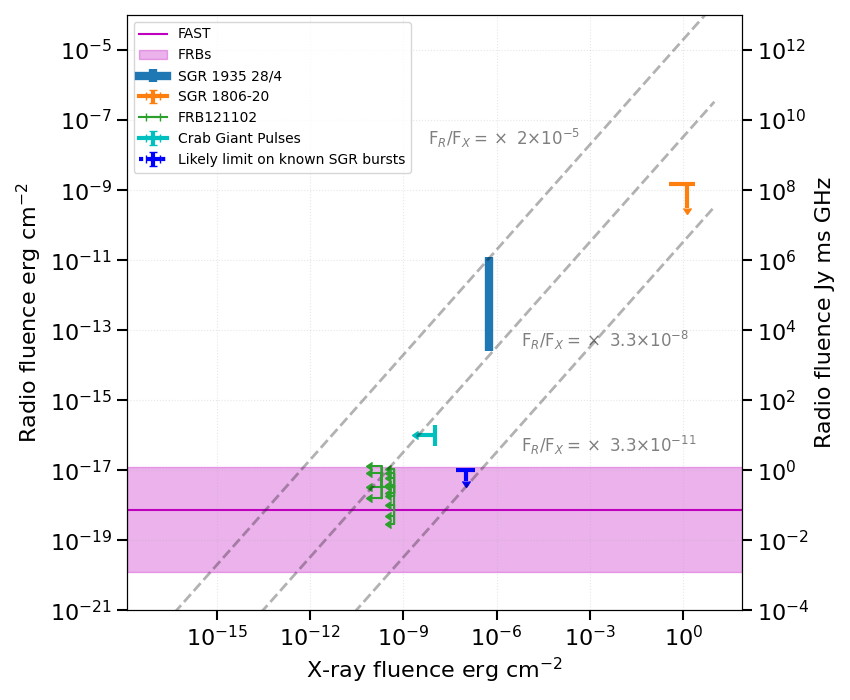

XX 2e-05 XX
YYY:: 2.0 2
2$\times$10$^{-5}$
XX 3.3333333333333334e-08 XX
YYY:: 3.3333333333333335 3.3
3.3$\times$10$^{-8}$
XX 3.3333333333333335e-11 XX
YYY:: 3.3333333333333335 3.3
3.3$\times$10$^{-11}$
[1.e-04 1.e+13]


In [399]:
plt.figure(figsize=(8.5,7))
ax=plt.gca()
ax1=ax


plt.grid(True, alpha=0.3, ls=":")

y = (frb_isgri[1]['fluence'][0].to(u.erg/u.cm**2).value + frb_isgri[2]['fluence'][0].to(u.erg/u.cm**2).value)/2.
dy1 = y - frb_isgri[1]['fluence'][0].to(u.erg/u.cm**2).value
dy2 = frb_isgri[2]['fluence'][0].to(u.erg/u.cm**2).value - y

plt.errorbar(
    x=[frb_isgri[0]['fluence'][0].to(u.erg/u.cm**2).value],
    y=[y],
    yerr=([dy1], [dy2]),
    label="SGR 1935 28/4 ",
    lw=6,
    #fmt="+",
    #markersize=25,
)

# 110 MJy tendulkar 2016

#plt.axvline(
#    sgr1806_giant[0]['fluence'][0].to(u.erg/u.cm**2).value,
#    c='r',
#    label="SGR 1806-20"
#)

plt.errorbar(
    x=[sgr1806_giant[0]['fluence'][0].to(u.erg/u.cm**2).value],
    y=[sgr1806_giant[1]['fluence'][0].to(u.erg/u.cm**2).value],
    yerr=[sgr1806_giant[1]['fluence'][0].to(u.erg/u.cm**2).value*0.8],
    xerr=[
        [sgr1806_giant[0]['fluence'][1].to(u.erg/u.cm**2).value],
        [sgr1806_giant[0]['fluence'][2].to(u.erg/u.cm**2).value],
    ],
    label="SGR 1806-20",
    lw=3,
    uplims=[True]
    #fmt="+",
    #markersize=25,
)



# FAST
fast_isgri

plt.axhline(
    fast_isgri[0]['fluence'][0].to(u.erg/u.cm**2).value,
    c='m',
    label="FAST"
)

# FRBs

frbs=[]


frbs.append(dict(
    energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
    fluence = np.array((1,1,1))*u.mJy*u.ms * u.GHz*1.25    
))
frbs.append(dict(
    energy = (np.array((1.25, 1.25-0.46, 1.25+0.46))* u.GHz ) * const.h,
    fluence = np.array((1000,1000,1000))*u.mJy*u.ms * u.GHz*1.25    
))


for f in frbs:
    f['eiso'] = f['fluence']*sgr1935_distance**2*4*np.pi


plt.axhspan(
    frbs[0]['fluence'][0].to(u.erg/u.cm**2).value,
    frbs[-1]['fluence'][0].to(u.erg/u.cm**2).value,
    color='m',
    label="FRBs",
    alpha=0.3
)


## 121012
# https://iopscience.iop.org/article/10.3847/1538-4357/aa8456


plt.errorbar(
    [f['fluence_xray'][0].to(u.erg/u.cm**2).value for f in frb121102_bursts],
    [f['fluence_radio'][0].to(u.erg/u.cm**2).value for f in frb121102_bursts],
    xuplims=np.ones(len(frb121102_bursts), dtype=bool),
    xerr=1e-10,
    label="FRB121102"
)

#### Crab
#https://arxiv.org/pdf/1004.2803.pdf

crab_giant_fluence = (1e4*u.Jy*u.microsecond*u.GHz).to(u.erg/u.cm**2).value

plt.errorbar(
    np.array([1e-8]),
    np.array([crab_giant_fluence]),
    yerr=[np.array([crab_giant_fluence*0.5]), np.array([crab_giant_fluence])],
    xerr=np.array([0.7e-8]),
    xuplims=np.array([True]),
    c="c",    
    lw=3,
    label="Crab Giant Pulses"
)

#### Possible UL FRB on SGR
#https://arxiv.org/pdf/1004.2803.pdf

frb_lim_typical = (1*u.mJy*u.s*u.GHz).to(u.erg/u.cm**2).value
sgr_typical = 1e-7

plt.errorbar(
    np.array([sgr_typical]),
    np.array([frb_lim_typical]),
    yerr=np.array([frb_lim_typical*0.5]),
    xerr=[np.array([sgr_typical*0.5]), np.array([sgr_typical])],
    #xerr=np.array([0.7e-8]),
    uplims=np.array([True]),
    c="b",    
    ls=":",
    lw=3,
    label="Likely limit on known SGR bursts"
)

    


#### ISGRI lim sens

#ax1.axvline(
#    1e-8,
#    c="g",
#    alpha=0.5,
#    label="ISGRI in 1 s"
#)




#### solar radio flares

if False:
    solar_ec = (100*1e4*u.Jy*u.GHz*u.s).to(u.erg/u.cm**2).value

    print("solar_sc:", solar_ec)

    ax1.axhline(
        solar_ec,
        c="y",
        alpha=0.5,
        label="Bright Solar Radio"
    )

### guide

guide = np.array([1e-17, 10])

for factor in 5e4, 3e7, 3e10:
    plt.plot(
        guide,
        guide/factor,
        ls="--",
        alpha=0.3,
        c="k",
        lw=2
    )
    
    offx=1
    offy=1
    
    if factor < 1e5:
        offx=1e-3
        offy=1e3

    plt.text(1e-6*6*offx,
             1e-6/factor*offy, 
             "F$_R$/F$_X = \\times$ "+latex_exp(1./factor),
             fontproperties=font_manager.FontProperties(size=12), alpha=0.5)


ax2=ax1.twinx()

ax1.set_ylim([1e-21, 1e-4])
ax1.set_yscale('log')
ax1.set_xscale('log')

lm = (np.array(ax1.get_ylim())*u.erg/u.cm**2).to(u.Jy*u.ms*u.GHz).value

print(lm)

ax2.set_ylim(
    lm
)
ax2.loglog()

plt.loglog()


ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)

ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.tick_params(which='major', width=1.5, length=7)
ax2.tick_params(which='minor', width=1.5, length=4)

ax1.legend()


ax1.set_xlabel("X-ray fluence erg cm$^{-2}$", fontproperties=font_prop)
ax1.set_ylabel("Radio fluence erg cm$^{-2}$", fontproperties=font_prop)
ax2.set_ylabel("Radio fluence Jy ms GHz", fontproperties=font_prop)

plt.tight_layout()

plt.savefig("draft/PAPER_SGR1935_INTEGRAL/fig/diagnostic/fluence_fluence.png")

In [360]:
frb_isgri[-1]['']

{'energy': <Quantity [8.28258769e-34, 5.23459542e-34, 1.13305800e-33] GHz J s>,
 'fluence': <Quantity [1.25, 1.25, 1.25] GHz MJy ms>,
 'eiso': <Quantity [1300.77643822, 1300.77643822, 1300.77643822] GHz kpc2 MJy ms>}